In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?q=" + cities[0] + "&APPID=" + api_key
#response = requests.get(url).json()
#pprint(response)

In [8]:
city = []
country = []
date = []
coord_lat = []
coord_lon = []
temp = []
humidity = []
wind_speed = []
cloudiness = []

for each in cities:
    API = "http://api.openweathermap.org/data/2.5/weather?q=" + each + "&APPID=" + api_key
    responses = requests.get(API).json()
    if "coord" not in responses or "lat" not in responses["coord"]:
        continue
    city.append(responses["name"])
    country.append(responses["sys"]["country"])
    day = pd.to_datetime(responses["dt"], unit= "s")
    date.append(day)
    coord_lat.append(responses["coord"]["lat"])
    coord_lon.append(responses["coord"]["lon"])
    temp.append(responses["main"]["temp_max"])
    humidity.append(responses["main"]["humidity"])
    wind_speed.append(responses["wind"]["speed"])
    cloudiness.append(responses["clouds"]["all"])



In [5]:
cities_df = pd.DataFrame({"City" : city,
                          "Country" : country,
                          "Date" : date,
                          "Latitude" : coord_lat, 
                          "Longtitude" : coord_lon, 
                          "Temperature" : temp, 
                          "Humidity" : humidity, 
                          "Wind Speed" : wind_speed,
                          "Cloudiness" : cloudiness})
cities_df.head()

,City,Country,Date,Latitude,Longtitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Atuona,PF,2018-07-17 23:48:58,-9.80,-139.03,299.576,100,6.01,44
1,Qaanaaq,GL,2018-07-17 23:53:48,77.48,-69.36,276.476,90,0.76,0
2,Iberia,PE,2018-07-17 23:53:48,-11.41,-69.49,299.376,69,1.51,0
3,Iqaluit,CA,2018-07-17 23:00:00,63.75,-68.52,276.150,93,5.10,90
4,Denpasar,ID,2018-07-17 23:00:00,-8.65,115.22,298.150,88,3.60,20


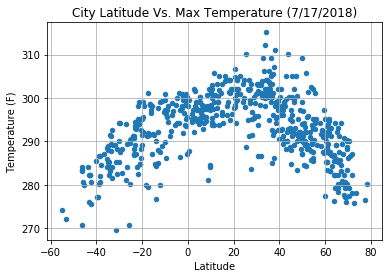

In [9]:
temp_plt = cities_df.plot.scatter(x= "Latitude", y= "Temperature", title= "City Latitude vs. Max Temperature (7/17/2018)", grid= True)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
temp_plt

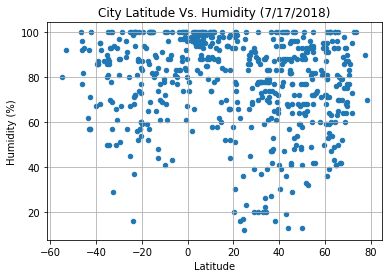

In [10]:
humidity_plt = cities_df.plot.scatter(x= "Latitude", y= "Humidity", title= "City Latitude vs. Humidity (7/17/2018)", grid= True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
humidity_plt

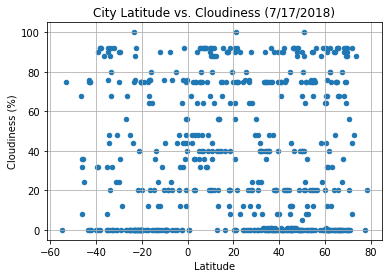

In [13]:
cloudiness_plt = cities_df.plot.scatter(x= "Latitude", y="Cloudiness", title= "City Latitude vs. Cloudiness (7/17/2018)", grid= True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
cloudiness_plt

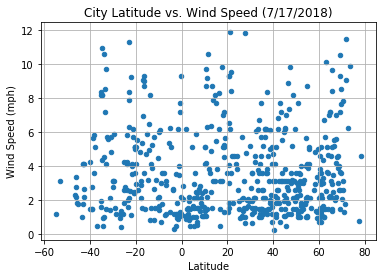

In [14]:
wind_speed_plt = cities_df.plot.scatter(x= "Latitude", y= "Wind Speed", title= "City Latitude vs. Wind Speed (7/17/2018)", grid= True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
wind_speed_plt